<a href="https://colab.research.google.com/github/VfrMark/Boston_housing_escola_de_verao/blob/main/Projeto_Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto offline de aprendizado de máquina de ponta a ponta**


---
Neste notebook será desenvolvido modelos preditivos para o setor imobiliário. Será usado um conjunto de dados do setor imobiliário de Boston.

Este projeto faz parte de uma do processo avaliativo do curso *Aprendizado de Máquinas - XXII Escola de Verão - PPGMTM - UFSC* oferecido pelo Prof. Edson.

Aluno: Marcos Rosa - 18100695


### **Configuração inicial**

Nesta sessão tomaremos alguns passos importantes antes de iniciar de fato a trabalhar com os dados como importar bibliotecas necessárias, fixar uma *seed* para processos pseudoaleatórios, etc...

In [1]:
# Importações comuns
import numpy as np
import os

In [2]:
# Fixar seed
seed = 21
np.random.seed(seed)

In [3]:
# Configurações para plotar gráficos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### **Problema em questão**

Nosso objetivo é: utilizando o conjunto de dados que temos, criar um modelo que consiga prever o preço de casas em Boston por meio das características disponíveis nos dados. Como temos dados rotulados, faremos a abordagem por aprendizado supervisionado.

### **Importação dos dados**

Os dados foram importados dos datasets padrão já existentes no sklearn, A celula a seguir importa os dados e coloca em um Pandas DataFrame.

In [4]:
#Importações necessárias
import pandas as pd
from sklearn.datasets import load_boston

features, label = load_boston(return_X_y = True)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
housing_df = pd.DataFrame(data=features, columns = column_names)
housing_df["MEDV"] = label

###**Conhecendo os dados**

In [5]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


A seguir vamos ver algumas informações importantes sobre as variáveis do problema em questão.

In [6]:
housing_df.info() #Descrição dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Podemos observar já que não há caracteristicas categóricas neste problema, apenas variáveis quantitativas discretas e contínuas.

A seguir descreveremos quais são as características (features) do problema em questão

  1.  CRIM - Taxa de crime per capita por cidade.
  2.  ZN - Proporção de terrenos residenciais zoneados para lotes com mais de 25.000ft quadrados.
  3.  INDUS - Proporção de negócios não varejistas por cidade (Medido em *acres*).
  4.  CHAS - *Charles River dummy variable* (1 se determinada extensão de terra é limitado pelo rio, 0 se não).
  5.  NOX - Concentração de oxigênio nítrico.
  6.  RM - Número médio de cômodos por casa.
  7.  AGE - proporção de unidades ocupadas pelo proprietário construídas antes de 1940.
  8.  DIS - distâncias ponderadas até cinco centros de empregos de Boston.
  9.  RAD - índice de acessibilidade a rodovias radiais.
  10. TAX - taxa de imposto sobre o valor total da propriedade por cada 10.000 dolares.
  11. PTRATIO - Número de alunos para cada professor por cidade.
  12. B - Proporção de negros por cidade.
  13. LSTAT - Porcentagem da população que tem um status baixo.
  14. MEDV - Valor médio de casas ocupadas pelo proprietário em US $1.000.

  Mais informações podem ser encontradas no [artigo](https://www.sciencedirect.com/science/article/pii/0095069678900062)

In [7]:
housing_df.describe() #Medidas de resumo

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


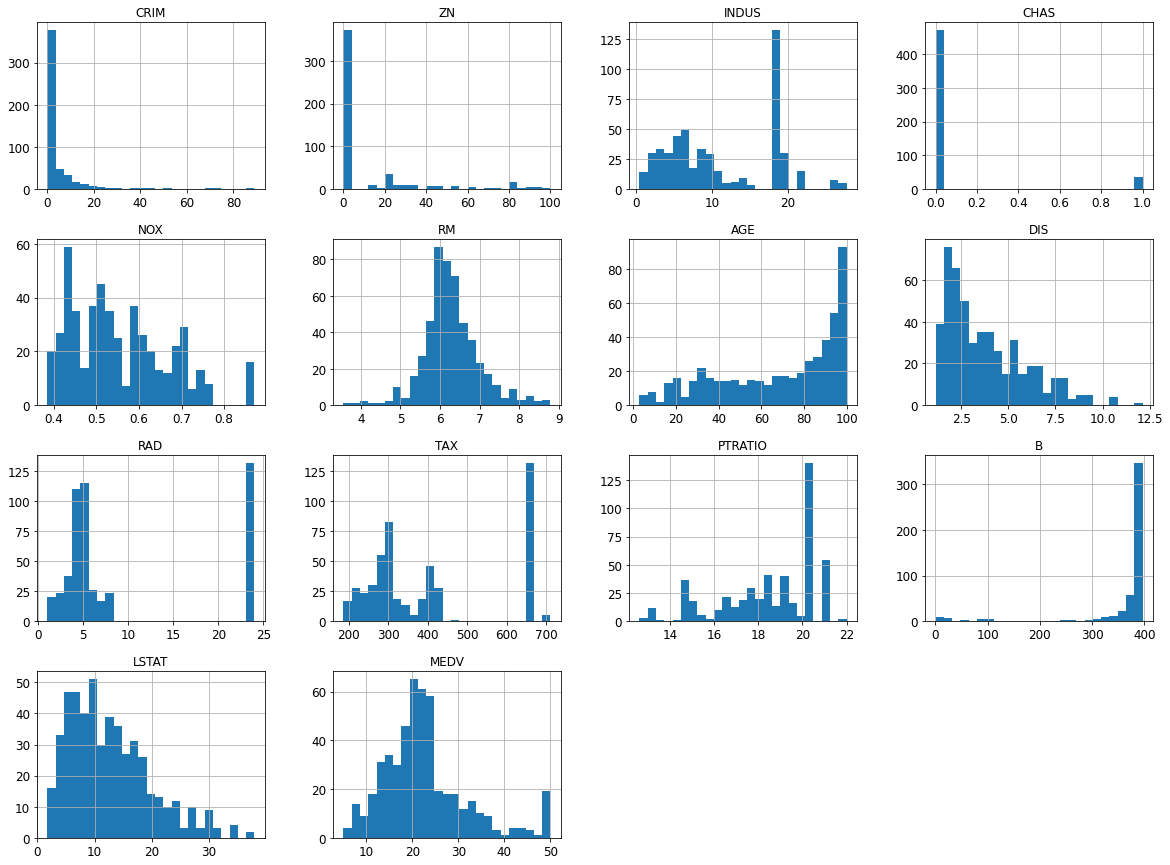

In [8]:
housing_df.hist(bins=25, figsize=(20,15))
plt.show()

###Separando o conjunto de dados

Utilizaremos a abordagem por amostragem aleatória, pode ser que ao conversarmos com um estatistico um outro tipo de amostragem seja indicada, mas no momento utilizaremos esse processo totalmente aleatório e em um futuro o processo pode ser melhorado e o modelo otimizado.

In [9]:
from sklearn.model_selection import train_test_split

housing_train, housing_test = train_test_split(housing_df, test_size=0.2, random_state=seed) #Separação dos dados em treino/teste

### **Visualização da estrutura dos dados**

In [10]:
housing = housing_train.copy() #Copia do conjunto de treino

In [11]:
corr_matrix = housing.corr() #Matriz de correlação
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.205153,0.415541,-0.058162,0.445592,-0.273825,0.367262,-0.390341,0.653944,0.608553,0.296222,-0.382488,0.511990,-0.408778
ZN,-0.205153,1.000000,-0.520133,-0.025958,-0.505844,0.340048,-0.564677,0.649997,-0.303583,-0.320086,-0.400739,0.173093,-0.404712,0.383460
INDUS,0.415541,-0.520133,1.000000,0.056682,0.757482,-0.382700,0.638741,-0.710516,0.576866,0.701502,0.366079,-0.348548,0.574174,-0.464842
CHAS,-0.058162,-0.025958,0.056682,1.000000,0.079622,0.110294,0.072439,-0.094184,0.002452,-0.029527,-0.122383,0.047268,-0.078825,0.211300
NOX,0.445592,-0.505844,0.757482,0.079622,1.000000,-0.316962,0.719913,-0.761806,0.594469,0.656319,0.160293,-0.385115,0.565845,-0.423129
RM,-0.273825,0.340048,-0.382700,0.110294,-0.316962,1.000000,-0.243309,0.231958,-0.224188,-0.291949,-0.351819,0.132640,-0.617743,0.685814
AGE,0.367262,-0.564677,0.638741,0.072439,0.719913,-0.243309,1.000000,-0.738557,0.431885,0.486142,0.242545,-0.263706,0.580343,-0.371996
DIS,-0.390341,0.649997,-0.710516,-0.094184,-0.761806,0.231958,-0.738557,1.000000,-0.480595,-0.524435,-0.228057,0.288837,-0.479280,0.254949
RAD,0.653944,-0.303583,0.576866,0.002452,0.594469,-0.224188,0.431885,-0.480595,1.000000,0.909115,0.459079,-0.418520,0.472520,-0.365569
TAX,0.608553,-0.320086,0.701502,-0.029527,0.656319,-0.291949,0.486142,-0.524435,0.909115,1.000000,0.454611,-0.421688,0.516276,-0.449772


In [12]:
corr_matrix['MEDV'].sort_values(ascending=False) #Correlação de MEDV em ordem decrescente

MEDV       1.000000
RM         0.685814
ZN         0.383460
B          0.338581
DIS        0.254949
CHAS       0.211300
RAD       -0.365569
AGE       -0.371996
CRIM      -0.408778
NOX       -0.423129
TAX       -0.449772
INDUS     -0.464842
PTRATIO   -0.504456
LSTAT     -0.741047
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5620fc9e8>,
      dtype=object)

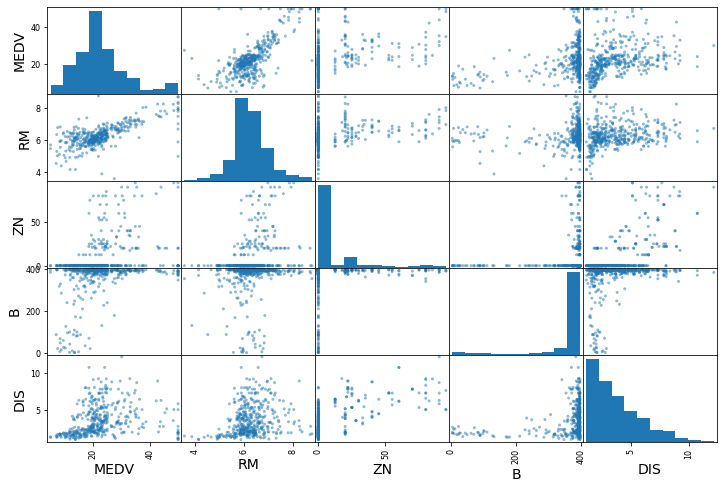

In [13]:
from pandas.plotting import scatter_matrix

attributes = ['MEDV', 'RM', 'ZN', 'B', 'DIS']
scatter_matrix(housing[attributes], figsize=(12, 8)) #plotar a matriz de correlação

A caracteristica com maior correlação com o valor médio das casas é o número médio de cômodos por casa, vamos visualizar separadamente a seguir.

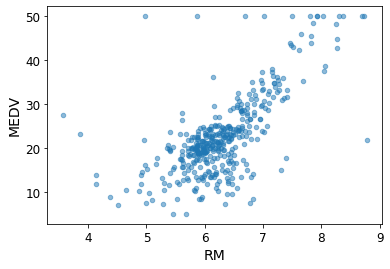

In [14]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.5)

Apesar de não possuir um número grande de dados no nosso conjunto podemos observar uma correlação forte entre essas caracteristicas e ainda um possível valor limitante de 50000 para o valor médio das casas.

### **Feature Engineering**

Esta parte não será desenvolvida, pois seria necessário maior conhecimento da área em questão para entender que outras caracteristicas poderiam ser melhores exploradas com as informações já obtidas.

### **Preparando os dados para o modelo**

In [15]:
housing_features = housing_train.drop('MEDV', axis=1) #Salvando copia apenas das features
housing_labels = housing_train['MEDV'].copy() #Salvando uma copia apenas das labels

Podemos ver a seguir que não há nenhuma célula nula

In [16]:
null_rows = housing_features[housing_features.isnull().any(axis=1)].head #Gera um DataFrame com as celulas nulas.
null_rows #Como não há linhas nulas, temos apenas as colunas.

<bound method NDFrame.head of Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]
Index: []>

Mesmo não encontrando nenhuma celulas nula, ainda é importante fazer o tratamento de dados para celulas nulas caso tenha celulas nulas no conjunto de teste. Por isso, usaremos o SimpleImputer existente no sklearn.

In [17]:
from sklearn.impute import SimpleImputer

feature_imputer = SimpleImputer(strategy='median') #salvando com a abordagem que usaremos, mediana,

feature_imputer.fit(housing_features) #Imputer se adequando aos dados

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [18]:
feature_imputer.statistics_ #Ver as estatística calculadas na celula anterior

array([2.74475e-01, 0.00000e+00, 9.79500e+00, 0.00000e+00, 5.38000e-01,
       6.20850e+00, 7.92000e+01, 3.10730e+00, 5.00000e+00, 3.35000e+02,
       1.91000e+01, 3.91295e+02, 1.15750e+01])

O que fizemos agora foi apenas para visualização do processo, mas o processo completo no tratamento dos dados será feito pelo pipeline a seguir.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #Reescalar as variáveis.

pipeline = Pipeline([
             ('imputer', SimpleImputer(strategy='median')),
             ('scaler', StandardScaler())
             ]) #Pipeline que será usada para tratar os dados
housing_prepared = pipeline.fit_transform(housing_features) # pipeline adequando-se e sendo aplicada aos dados.

df_test = pd.DataFrame(data=housing_prepared, columns = housing_features.columns) #visualização de como os dados ficaram após passar pela pipeline.
df_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.472514,-0.471977,0.982839,-0.293294,0.488261,-0.245983,0.565607,-0.827247,1.654182,1.520964,0.795655,-3.955754,1.479947
1,-0.440726,0.664232,-0.943061,-0.293294,-1.129648,0.032283,-1.355215,0.811939,-0.635657,-0.754761,0.232458,0.449833,-0.843538
2,-0.443783,3.618374,-1.472538,-0.293294,-1.327584,1.356492,-1.729212,2.410859,-0.521165,-1.079865,-0.283806,0.438997,-1.111363
3,1.383990,-0.471977,0.982839,-0.293294,0.341961,0.528686,1.106632,-1.067044,1.654182,1.520964,0.795655,-3.592364,1.189686
4,-0.388758,-0.471977,-0.109571,3.409545,-0.587476,-1.307309,1.106632,0.071785,-0.635657,-0.778405,0.044726,0.449833,1.451902


### **Selecionar e treinar um modelo**

Vamos ver inicialmente como o modelo de regressão linear se comporta.

In [20]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(housing_prepared, housing_labels) # Modelo aprendendo os pârametros.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Vejamos agora quão bom é o nosso modelo através das métricas MAE e MSE

In [21]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

housing_predict = linear_reg.predict(housing_prepared) # Modelo já treinado predizendo os valores no conjunto de treino completo.

lin_mse = MSE(housing_labels, housing_predict) # Calculando o erro médio quadrático.
lin_rmse = np.sqrt(lin_mse) # Tirando a raiz do erro.

print('Raiz do erro médio quadrático:', lin_rmse)

Raiz do erro médio quadrático: 4.565595609448381


In [22]:
lin_mae = MAE(housing_labels, housing_predict) # Calculando o erro absoluto médio.

print('Erro médio absoluto:', lin_mae)

Erro médio absoluto: 3.2365905038589413


Vimos até aqui a forma mais simples de se treinar e avaliar um modelo, apenas para termos uma idéia de como se comportaria um modelo clássico até aqui. Vamos aplicar a seguir a validação cruzada na regressão linear e mais dois modelos, e comparar por fim quais deles tem menor error.

In [23]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(linear_reg, housing_prepared, housing_labels,
                             scoring='neg_mean_squared_error', cv=8) # Aplicando validação cruzada na regressão linear e salvando os scores de cada iteração.
lin_rmse_scores = np.sqrt(-lin_scores)

Vamos aplicar a seguir validação cruzada nos modelos árvore de decisão e floresta aleatória.

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=seed)
tree_reg.fit(housing_prepared, housing_labels) # Modelo aprendendo com os dados.

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                              scoring='neg_mean_squared_error', cv=8)
tree_rmse_scores = np.sqrt(-tree_scores)

In [25]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=20, random_state=seed)
forest_reg.fit(housing_prepared, housing_labels) #Treinando modelo

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                                scoring='neg_mean_squared_error', cv=8)
forest_rmse_scores = np.sqrt(-forest_scores)

In [37]:
def show_results(scores):       #Função para apresentar os resultados da validação cruzada.
    print("scores:", scores)
    print("mean:", scores.mean())
    print("standard devation:", scores.std())

In [38]:
show_results(lin_rmse_scores)

scores: [5.41418828 4.42626993 3.92771415 4.64205012 3.45048326 5.56435705
 4.26337235 6.10649209]
mean: 4.724365900862418
standard devation: 0.8409292468837025


In [39]:
show_results(tree_rmse_scores)

scores: [6.30959431 4.73826724 5.1974164  3.72698164 5.86162094 4.01970148
 3.90602099 5.47148974]
mean: 4.903886594132111
standard devation: 0.9008091119682856


In [40]:
show_results(forest_rmse_scores)

scores: [4.33114892 3.7226238  4.45833445 2.90733757 3.29390574 3.56233063
 3.05522331 4.44125275]
mean: 3.721519646655323
standard devation: 0.5860459582205777


Vemos então que o modelo que apresenta melhores resultados é o Random Forest, por isso tomaremos tal modelos para fazer um GridSearch, encontrar os melhores parâmetros e então avaliar por fim o nosso modelo no conjunto de teste.

### **Ajustando e selecionando o modelo**

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [5, 50, 75, 150], 
    'max_features' : [2, 5, 9, 13, 'log2']          
              } #Hyperparâmetros para serem testados.

forest_reg = RandomForestRegressor(random_state=seed)

grid_search = GridSearchCV(forest_reg, param_grid, cv=8,
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels) #Aplicando GridSearch com nossos dados

GridSearchCV(cv=8, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=21,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [31]:
grid_search.best_params_ #Ver os melhores parâmetros encontrados

{'max_features': 'log2', 'n_estimators': 50}

In [41]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.200631073037087 {'max_features': 2, 'n_estimators': 5}
3.5096126026090335 {'max_features': 2, 'n_estimators': 50}
3.5376303340255695 {'max_features': 2, 'n_estimators': 75}
3.529267951654444 {'max_features': 2, 'n_estimators': 150}
3.69404025318578 {'max_features': 5, 'n_estimators': 5}
3.4558960646136 {'max_features': 5, 'n_estimators': 50}
3.392334058395087 {'max_features': 5, 'n_estimators': 75}
3.3694642327746576 {'max_features': 5, 'n_estimators': 150}
3.766711594387619 {'max_features': 9, 'n_estimators': 5}
3.4691515071567354 {'max_features': 9, 'n_estimators': 50}
3.4949346516311457 {'max_features': 9, 'n_estimators': 75}
3.4266354368093177 {'max_features': 9, 'n_estimators': 150}
3.996895420198032 {'max_features': 13, 'n_estimators': 5}
3.5953189839938635 {'max_features': 13, 'n_estimators': 50}
3.5884641639613544 {'max_features': 13, 'n_estimators': 75}
3.5509830885309315 {'max_features': 13, 'n_estimators': 150}
3.581012733303029 {'max_features': 'log2', 'n_estimators': 5}


### **Modelo e teste final**

Após encontramos os melhores parâmetros para o modelo RandomForestRegressor na sessão anterior, utilizaremos este modelo com tais parâmetros como nosso modelo final e testaremos ele no nosso conjunto de teste que não foi usado até o momento. Assim teremos uma estimativa do erro do modelo em questão ao se deparar com dados nunca vistos antes.

In [35]:
final_model = grid_search.best_estimator_ #Salvando o melhor modelo encontrado pelo GridSearch, com os melhores parâmetros.

X_test = housing_test.drop('MEDV', axis=1)
y_test = housing_test['MEDV'].copy()

X_test_prepared = pipeline.transform(X_test) #Passando o conjunto de teste pela pipeline criada anteriormente.
final_predictions = final_model.predict(X_test_prepared) # Modelo predizendo o valor das casas dos dados novos.

In [36]:
final_mse = MSE(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

3.55474096019916

### **Conclusão**

Temos um erro final no conjunto de teste bem próximo ao erro encontrado no GridSearch, o que nos diz que encontramos bons parâmetros e nosso modelo lida da maneira esperada com dados que nunca foram visto, ou seja, nosso modelo consegue generalizar da maneira esperada.